<a href="https://colab.research.google.com/github/ridvanyigit/Natural-Language-Processing-NLP-/blob/main/FakeNews_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## EXPLORING FAKE NEWS

In [4]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/refs/heads/main/data/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

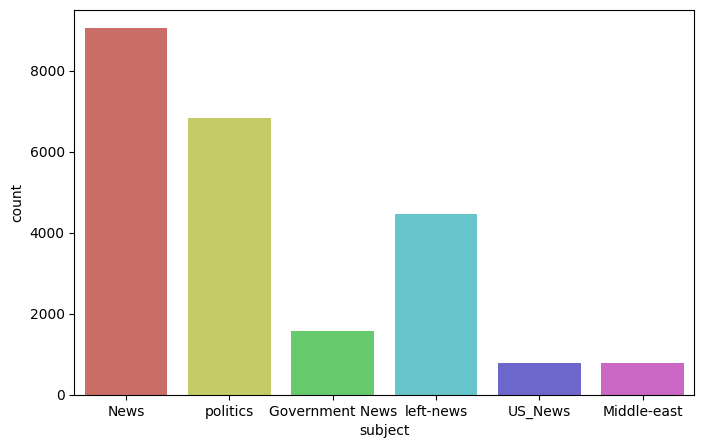

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='subject', data=fake, palette='hls')

## WORDCLOUD

In [8]:
example_sentence = ['this', 'is', 'an', 'example', 'sentence']

In [9]:
' '.join(example_sentence)

'this is an example sentence'

In [10]:
fake['text']

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


In [11]:
fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [12]:
fake['text'].tolist()[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [13]:
text = ' '.join(fake['text'].tolist())

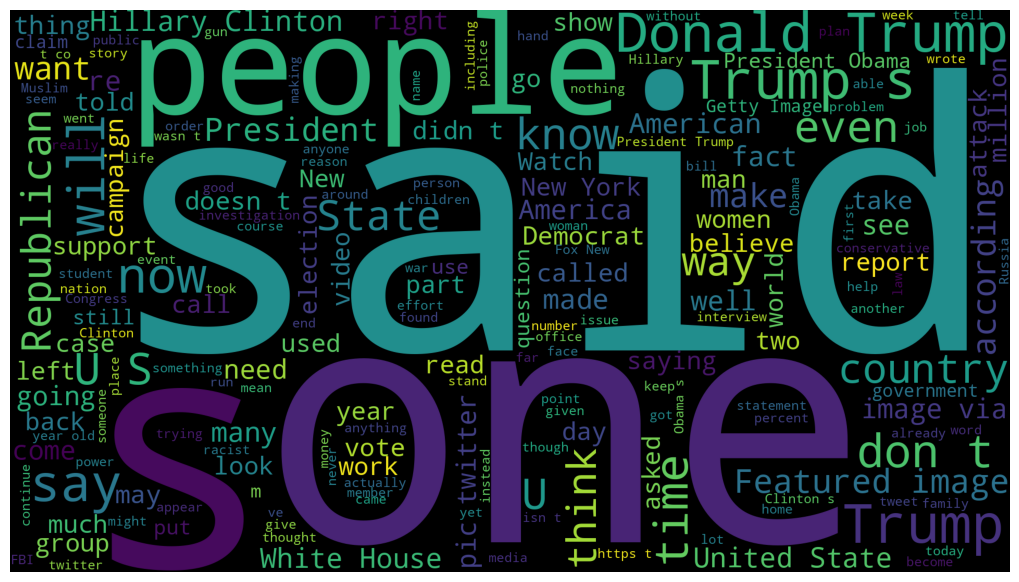

In [14]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## EXPLORING REAL NEWS

In [15]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/refs/heads/main/data/True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
text = ' '.join(real['text'].tolist())

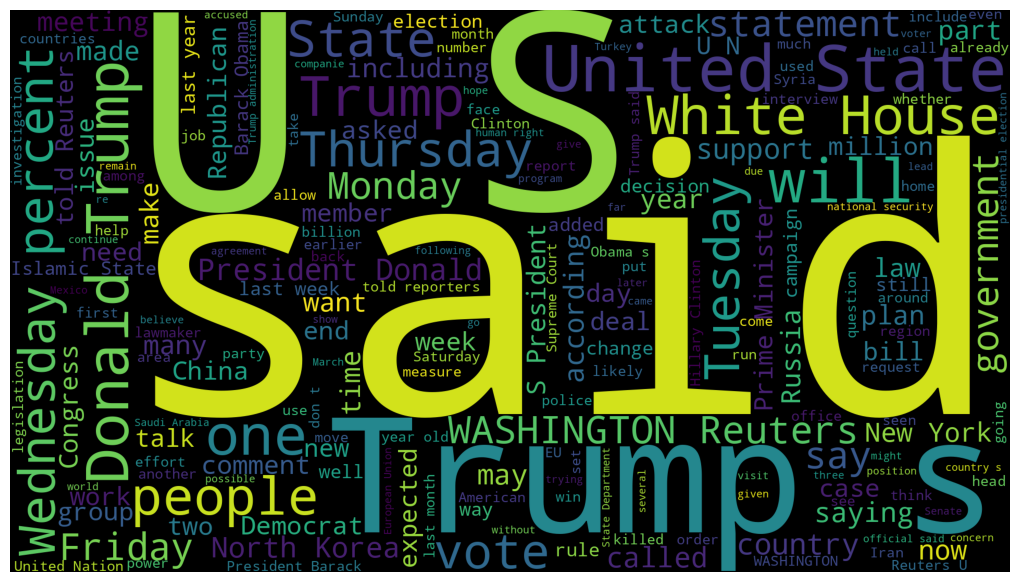

In [17]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
real.sample(5)

,title,text,subject,date
17487,"Pakistan's hostage rescue hailed, but tensions...",(This version of the story corrects spelling ...,worldnews,"October 13, 2017"
2617,The Sean Spicer Show: White House spokesman's ...,WASHINGTON (Reuters) - Sean Spicer burst onto ...,politicsNews,"July 21, 2017"
6100,California Senate confirms Democrat Becerra as...,"SACRAMENTO, Calif. (Reuters) - The California ...",politicsNews,"January 23, 2017"
19314,"New Zealand goes to polls on Saturday, ending ...",WELLINGTON (Reuters) - New Zealanders go to th...,worldnews,"September 22, 2017"
8529,Trump expected to endorse Ryan for re-election...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"August 5, 2016"


In [19]:
real.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [20]:
unknown_publichers =[]
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0]) < 120)
  except:
    unknown_publichers.append(index)

In [21]:
len(unknown_publichers)

222

In [22]:
real.iloc[unknown_publichers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [23]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [24]:
real = real.drop(8970, axis=0)

In [25]:
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
  if index in unknown_publichers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [26]:
real['publisher'] = publisher
real['text'] = tmp_text

In [27]:
real.shape

(21416, 5)

In [28]:
empry_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [29]:
fake.iloc[empry_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [30]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [31]:
real['text'].apply(lambda x: str(x).lower())

,text
0,"as u.s. budget fight looms, republicans flip t..."
1,u.s. military to accept transgender recruits o...
2,senior u.s. republican senator: 'let mr. muell...
3,fbi russia probe helped by australian diplomat...
4,trump wants postal service to charge 'much mor...
...,...
21412,'fully committed' nato backs new u.s. approach...
21413,lexisnexis withdrew two products from chinese ...
21414,minsk cultural hub becomes haven from authorit...
21415,vatican upbeat on possibility of pope francis ...


In [32]:
fake['text'].apply(lambda x: str(x).lower())

,text
0,donald trump sends out embarrassing new year’...
1,drunk bragging trump staffer started russian ...
2,sheriff david clarke becomes an internet joke...
3,trump is so obsessed he even has obama’s name...
4,pope francis just called out donald trump dur...
...,...
23476,mcpain: john mccain furious that iran treated ...
23477,justice? yahoo settles e-mail privacy class-ac...
23478,sunnistan: us and allied ‘safe zone’ plan to t...
23479,how to blow $700 million: al jazeera america f...


## PREPROCESSING TEXT

In [33]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk
!pip install beautifulsoup4
!pip install textblob
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
!pip install googletrans==4.0.0rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-wxx004qw
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-wxx004qw
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8175 sha256=2a58c582e156ac066f6ecb016290d88051cf9024e857b3d87f8511143ec5de59
  Stored in dir

In [34]:
import preprocess_kgptalkie as ps

In [35]:
real['class'] = 1
fake['class'] = 0

In [36]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [37]:
real = real[['text', 'class']]

In [38]:
fake = fake[['text', 'class']]

In [39]:
data = pd.concat([real, fake], ignore_index=True)
data.sample(5)

,text,class
1725,Trump says immigration deal with Democrats clo...,1
21205,French foreign minister to travel to Libya to ...,1
31268,ABC Producing Comedy Involving Illegal Alien F...,0
16550,New Zealand protectionist Winston Peters appoi...,1
18255,"Venezuela's unrest, food scarcity take psychol...",1


In [40]:
example_text = re.sub(' +', ' ', ps.remove_special_chars('this ,. @ # is gre@t'))
example_text

'this is gret'

In [41]:
data['text'].apply(lambda x: re.sub(' +', ' ', ps.remove_special_chars(x)))

,text
0,As US budget fight looms Republicans flip thei...
1,US military to accept transgender recruits on ...
2,Senior US Republican senator Let Mr Mueller do...
3,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge much more...
...,...
44892,McPain John McCain Furious That Iran Treated U...
44893,JUSTICE Yahoo Settles Email Privacy Classactio...
44894,Sunnistan US and Allied Safe Zone Plan to Take...
44895,How to Blow 700 Million Al Jazeera America Fin...


In [42]:
data.sample(20)

,text,class
31149,DRAMA QUEEN CHRIS MATTHEWS Claims Republican ‘...,0
11073,Democratic candidate Bernie Sanders in good he...,1
7275,Thousands of students carry protests against T...,1
37549,15 SURPRISING FACTS About The White House East...,0
17003,Factbox: Business empire of Czech election fro...,1
5885,U.S. homeland security head: Entry of lawful p...,1
15338,Zimbabwe's ruling party expels former vice pre...,1
26479,"Two Muslim Men Shot To Death In Queens, Local...",0
15516,Tanzania's Magufuli sacks officials who failed...,1
10950,Obama claims victory after drop in U.S. jobles...,1


## Vectorization -- **`Word2Vec`**

In [43]:
import gensim

In [44]:
y = data['class'].values

In [45]:
X = [d.split() for d in data['text'].tolist()]

In [46]:
print(X[0])

['As', 'U.S.', 'budget', 'fight', 'looms,', 'Republicans', 'flip', 'their', 'fiscal', 'script', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'U.S.', 'Congress,', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts,', 'called', 'himself', 'a', '“fiscal', 'conservative”', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018.', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans,', 'U.S.', 'Representative', 'Mark', 'Meadows,', 'speaking', 'on', 'CBS’', '“Face', 'the', 'Nation,”', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending,', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January.', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday,', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to

In [47]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [48]:
len(w2v_model.wv)

420494

In [49]:
w2v_model.wv['love']

array([ 2.9727771 ,  0.4738145 , -3.097623  , -1.1681999 ,  2.8667607 ,
       -1.4285926 ,  3.7902274 ,  1.8943443 , -2.3422954 ,  1.1078559 ,
       -2.4951544 ,  1.6472365 , -0.60368943,  2.5125837 ,  3.990328  ,
       -0.05635892,  0.68812627, -0.6942542 ,  1.8494475 , -3.391286  ,
       -0.51063097, -4.7134337 , -0.06581412, -4.4848523 , -2.9969845 ,
        2.5059953 , -2.9008641 , -0.0131225 , -1.376984  , -0.8511106 ,
        4.064694  ,  0.12298211, -1.1784612 ,  2.5420964 , -1.742365  ,
        2.07296   , -1.2904505 , -0.08823254, -0.18805966, -0.5731851 ,
        3.2321131 ,  0.06120698,  0.5901956 ,  0.9505635 ,  2.5147727 ,
       -1.5789042 ,  1.1822472 , -2.9661613 ,  2.2359598 ,  0.3772101 ,
        4.681779  ,  2.3863473 , -4.0531616 , -1.4435778 , -1.7591847 ,
        0.70195276,  0.06636456, -0.42082894,  1.9566234 , -2.8735313 ,
        5.7490916 , -1.479745  ,  0.87468743,  0.9965418 , -0.4448554 ,
        0.41840956,  0.82733417, -1.6709505 , -3.344675  , -0.65

In [50]:
w2v_model.wv['chine']

array([-5.91866374e-02,  3.41538265e-02, -3.61532308e-02,  5.13299033e-02,
       -8.42798315e-03, -6.17309213e-02, -5.95715456e-02,  7.17597604e-02,
       -2.45303269e-02, -4.18043835e-03, -3.67559865e-02, -1.23255257e-03,
       -1.46789162e-03,  1.82653945e-02, -1.02317780e-02,  1.44975679e-02,
       -2.33658366e-02, -1.86364651e-02, -4.10183556e-02, -4.40423600e-02,
       -2.36408655e-02, -4.99474956e-03,  3.42522413e-02,  4.92058694e-04,
        2.93309577e-02,  3.48019525e-02, -2.37065237e-02,  1.06910104e-02,
       -6.95975358e-03, -2.07588859e-02, -5.79415355e-03,  1.73640493e-02,
        2.82336529e-02, -3.01109366e-02, -3.68387029e-02,  2.04299353e-02,
        1.02676367e-02, -8.75763223e-03,  5.44169452e-03,  2.12720707e-02,
        7.55209615e-03, -5.05574048e-02, -2.93369661e-03,  8.99743754e-03,
       -2.06135842e-03, -1.61456112e-02, -3.77290621e-02,  6.68343436e-03,
       -7.29290675e-03,  8.51478893e-03, -5.21011977e-03, -4.58998838e-03,
       -2.79262289e-02,  

In [51]:
w2v_model.wv.most_similar('India')

[('India,', 0.7642562985420227),
 ('Pakistan', 0.7233222126960754),
 ('Pakistan,', 0.710175633430481),
 ('Malaysia', 0.6940815448760986),
 ('maritime', 0.6919426321983337),
 ('China,', 0.6886845827102661),
 ('Mexico,', 0.6845400929450989),
 ('China', 0.6824049949645996),
 ('Beijing’s', 0.6817149519920349),
 ('Australia,', 0.6791542172431946)]

In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [53]:
X = tokenizer.texts_to_sequences(X)

In [54]:
#tokenizer.word_index

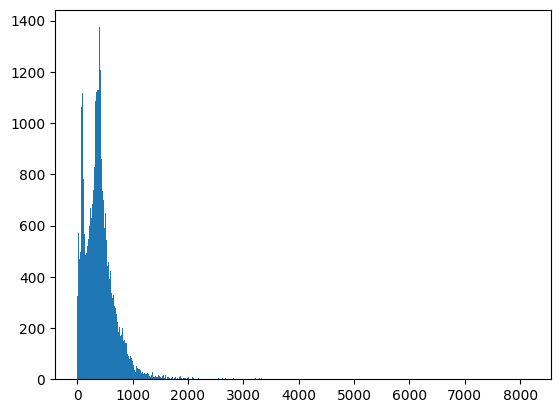

In [55]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [56]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1603

In [57]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [58]:
len(X[101])

1000

In [59]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index
DIM = 100

In [60]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    unknown_vector = np.random.rand(DIM)

    for word, i in vocab.items():
        try:
            weight_matrix[i] = model.wv[word]
        except KeyError:
            print(f"'{word}' word was not found in the model. Assigning a random vector.")
            weight_matrix[i] = unknown_vector

    return weight_matrix

In [61]:
embedding_vectors = get_weight_matrix(w2v_model)

Streaming output truncated to the last 5000 lines.
'sure!check' word was not found in the model. Assigning a random vector.
'magazine:if' word was not found in the model. Assigning a random vector.
'gibbons,' word was not found in the model. Assigning a random vector.
'gibbons' word was not found in the model. Assigning a random vector.
'carving.at' word was not found in the model. Assigning a random vector.
'https://t.co/hzypgkucg6' word was not found in the model. Assigning a random vector.
'pic.twitter.com/axwls5edpi' word was not found in the model. Assigning a random vector.
'protesters…several' word was not found in the model. Assigning a random vector.
'antifa.another' word was not found in the model. Assigning a random vector.
'pic.twitter.com/yfm9kagu1g' word was not found in the model. Assigning a random vector.
'2017#breaking:' word was not found in the model. Assigning a random vector.
'pic.twitter.com/re8dwumrfd' word was not found in the model. Assigning a random vector.


In [62]:
embedding_vectors.shape

(375374, 100)

In [63]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      37,537,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,537,400 (143.19 MB)

 Trainable params: 37,537,400 (143.19 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model.fit(X_train, y_train, batch_size= 32, validation_split=0.3, epochs=2)

Epoch 1/2
786/786 ━━━━━━━━━━━━━━━━━━━━ 2024s 3s/step - acc: 0.9156 - loss: 0.2129 - val_acc: 0.9104 - val_loss: 0.2198
Epoch 2/2
786/786 ━━━━━━━━━━━━━━━━━━━━ 2009s 3s/step - acc: 0.9746 - loss: 0.0707 - val_acc: 0.9752 - val_loss: 0.0743


In [67]:
y_pred = (model.predict(X_test)>=0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 145s 515ms/step


In [68]:
accuracy_score(y_test, y_pred)

0.9748329621380847

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4644
           1       1.00      0.95      0.97      4336

    accuracy                           0.97      8980
   macro avg       0.98      0.97      0.97      8980
weighted avg       0.98      0.97      0.97      8980



Model Testing

In [75]:
x = ['this is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [76]:
(model.predict(X_test)>=0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 520ms/step


array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [77]:
x = ['COVID-19 cases are on the rise, experts warn of new variants. The World Health Organization reported a significant increase in COVID-19 cases globally in recent weeks. Experts say the increase is due to the emergence of new variants that are more contagious. They urge people to continue taking precautions such as wearing masks and social distancing.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(X_test)>=0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 144s 513ms/step


array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])